In [1]:

import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
#new tricks
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [2]:
cancer = datasets.load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
cancer_df = shuffle(pd.DataFrame(data=np.c_[cancer['data'], cancer['target']],columns= list(cancer['feature_names']) + ['target']))
cancer_df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0.0
194,14.86,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.088780,0.1737,0.06672,...,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701,0.0
53,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.177200,0.106000,0.2092,0.06310,...,24.13,135.10,1321.0,0.1280,0.22970,0.26230,0.13250,0.3021,0.07987,0.0
381,11.04,14.93,70.67,372.7,0.07987,0.07079,0.035460,0.020740,0.2003,0.06246,...,20.83,79.73,447.1,0.1095,0.19820,0.15530,0.06754,0.3202,0.07287,1.0
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.273300,0.097110,0.2041,0.06898,...,27.57,125.40,832.7,0.1419,0.70900,0.90190,0.24750,0.2866,0.11550,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,...,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580,1.0
420,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,0.06267,...,26.98,86.43,520.5,0.1249,0.19370,0.25600,0.06664,0.3035,0.08284,1.0
374,13.69,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.020310,0.1872,0.05669,...,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701,1.0
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.032640,0.1375,0.06016,...,41.61,96.69,705.6,0.1172,0.14210,0.07003,0.07763,0.2196,0.07675,1.0


In [4]:
#Also plotting a scatter plot between mean smoothness and mean compactness

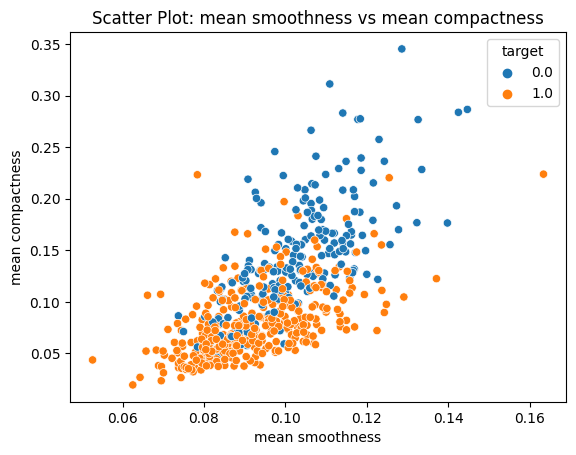

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called cancer_df

# Specify the x and y columns
x_column = 'mean smoothness'
y_column = 'mean compactness'

# Create the scatter plot
sns.scatterplot(x=x_column, y=y_column, data=cancer_df, hue='target')  # Use 'hue' to color points based on a target variable if available

# Customize plot labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot: {x_column} vs {y_column}')

# Show the plot
plt.show()


The above graph shows if the mean smoothness and mean compactness for the cancer presence is more  within the value of 0.15 

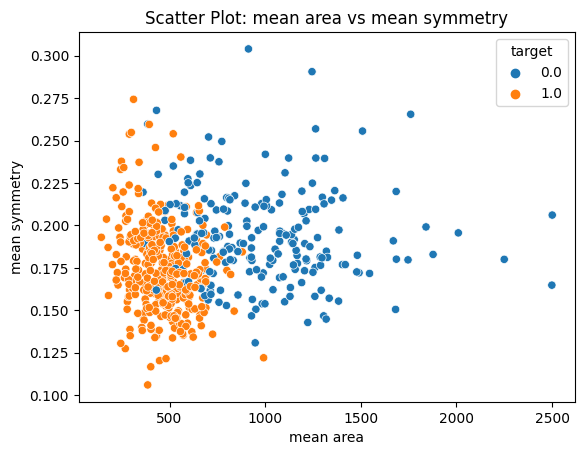

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called cancer_df

# Specify the x and y columns
x_column = 'mean area'
y_column = 'mean symmetry'

# Create the scatter plot
sns.scatterplot(x=x_column, y=y_column, data=cancer_df, hue='target')  # Use 'hue' to color points based on a target variable if available

# Customize plot labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot: {x_column} vs {y_column}')

# Show the plot
plt.show()

As per the scatter plots plotted above almost all the pairs are linearly seperabe and meanarea vs meansymmetry is more potential than mean smoothness and mean compactness also 

meanarea vs symmetry > mean area vs mean texture

In [7]:
#The above plot shows that for the cancer tumor presence the symmetry and area lies within the range of 500 and 0.225

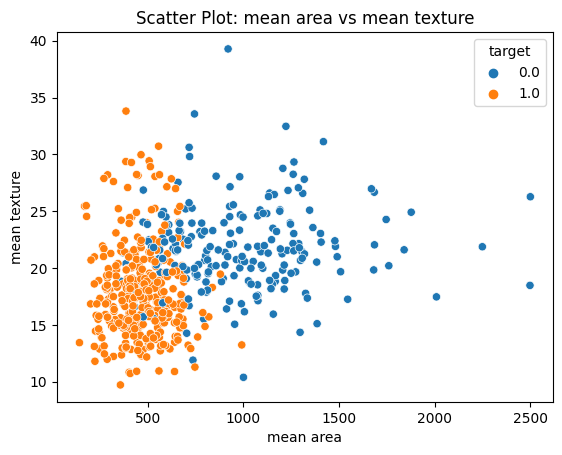

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called cancer_df

# Specify the x and y columns
x_column = 'mean area'
y_column = 'mean texture'

# Create the scatter plot
sns.scatterplot(x=x_column, y=y_column, data=cancer_df, hue='target')  # Use 'hue' to color points based on a target variable if available

# Customize plot labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot: {x_column} vs {y_column}')

# Show the plot
plt.show()

In [9]:
#The above plot shows that for the presence of cancer tumor the area is below 500 and the texture is less than 30

In [10]:
from sklearn.model_selection import train_test_split

# Assuming you have your data in cancer_df

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(cancer_df.drop('target', axis=1), cancer_df['target'], test_size=0.2, random_state=42)

# X_train: Training features
# y_train: Training labels
# X_test: Testing features
# y_test: Testing labels


In [11]:
#cancer_train_df = cancer_df.iloc[0:90]
#cancer_val_df = cancer_df.iloc[90:120]
#cancer_test_df = cancer_df.iloc[120:150]

#As we can see we cannot visually seperate the data for some cases and for some other cases we can see the values overlapped on each other hence we can say in most of the cases it is not linearly seperable


In [12]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

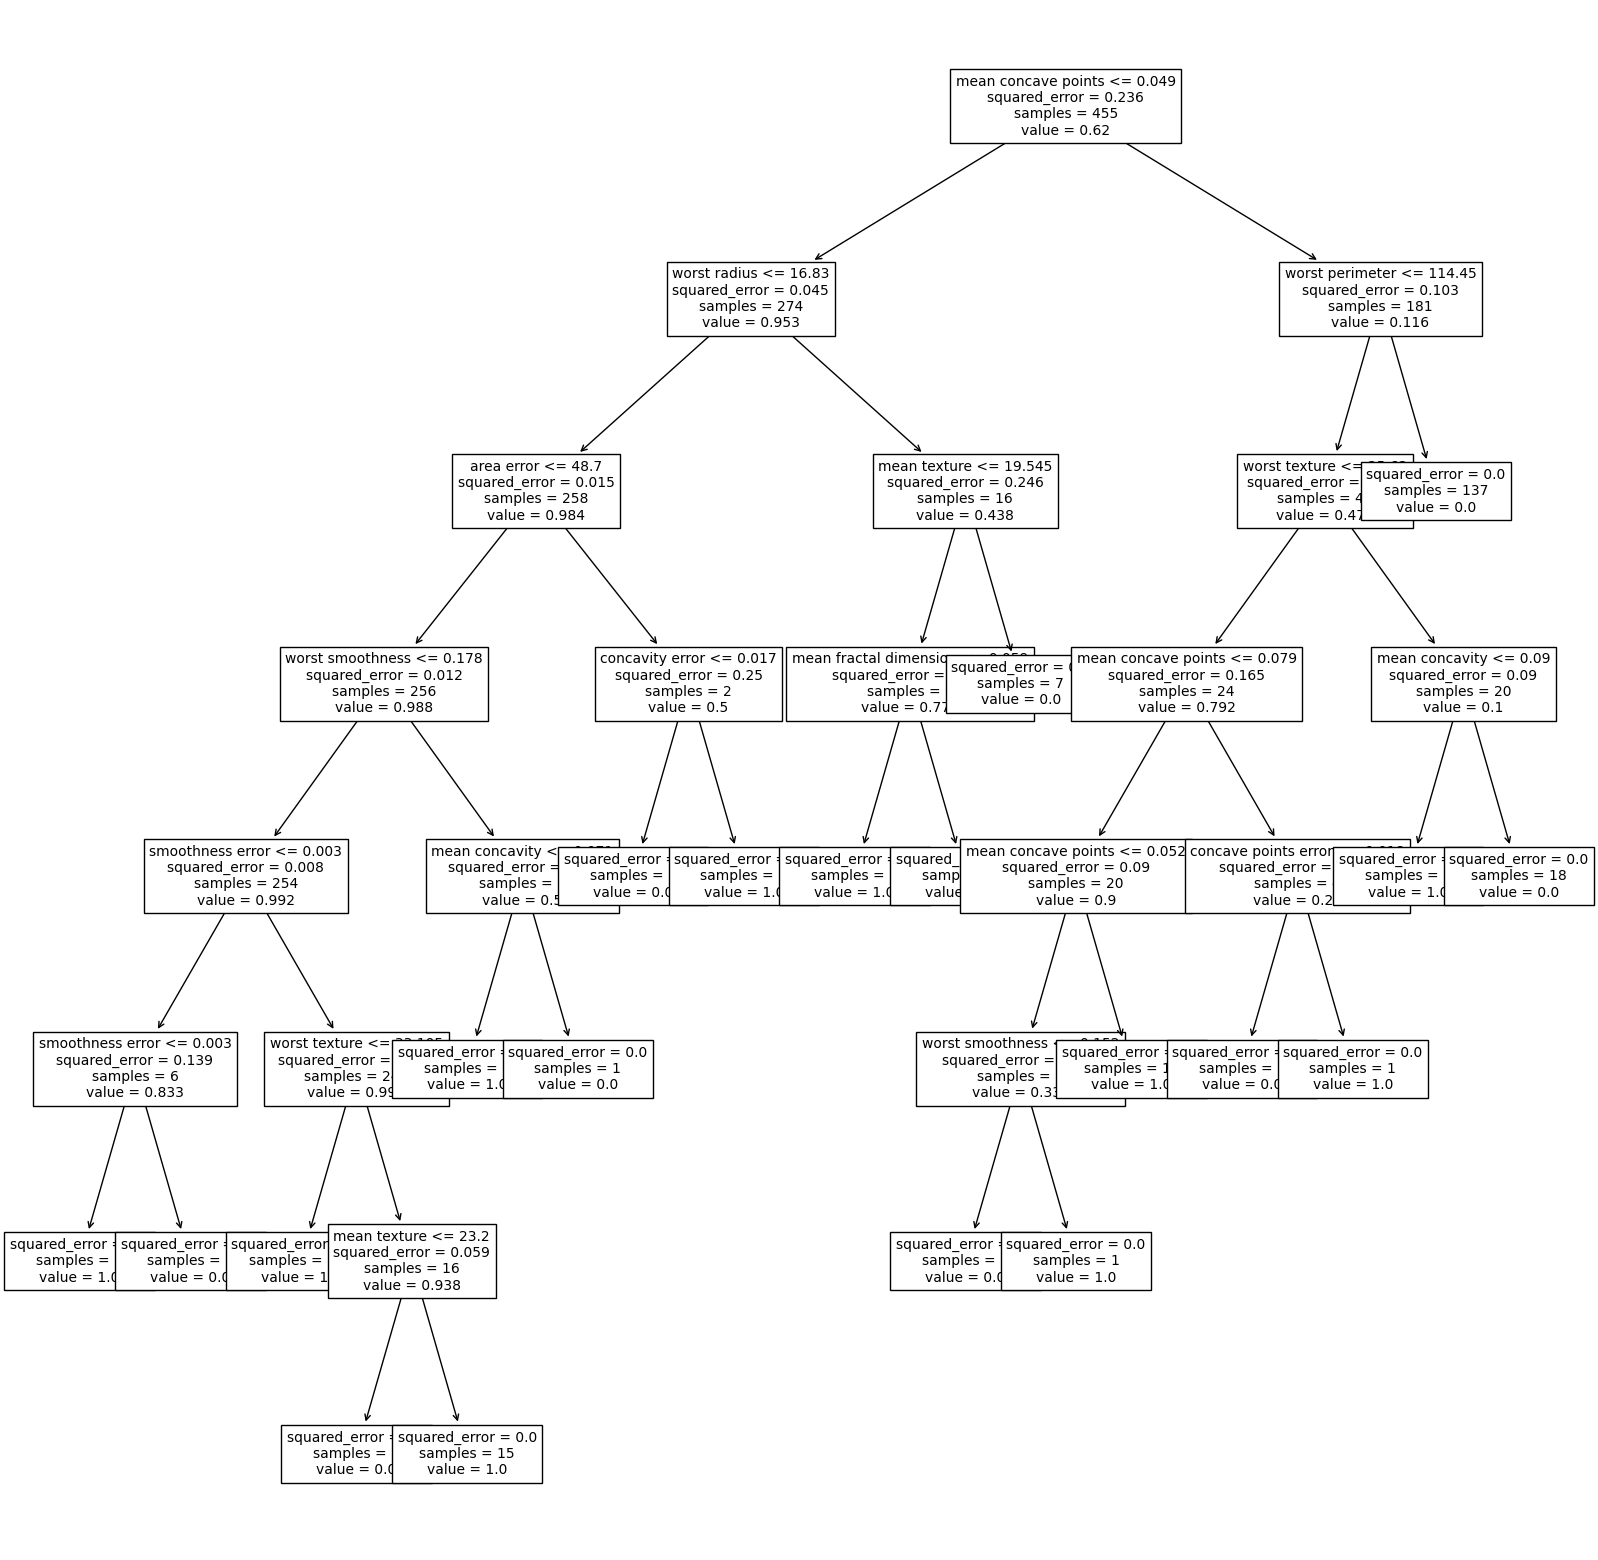

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
tree.plot_tree(tree_reg, feature_names=cancer.feature_names, fontsize=10)
plt.show()


In [14]:
#Determining top 5 features 

In [15]:
print(len(X_test))

114


In [16]:
test_pred = tree_reg.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,test_pred)

0.9473684210526315

In [19]:
import numpy as np

# Get feature importances from the trained tree regressor
feature_importances = tree_reg.feature_importances_

# Create a list of feature names
feature_names = X_train.columns  # Assuming cancer_train_df contains your training data

# Create a dictionary to store feature names and their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 features
top_5_features = sorted_features[:5]

# Print the top 5 features and their importances
for feature, importance in top_5_features:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: mean concave points, Importance: 0.735081543469145
Feature: worst perimeter, Importance: 0.07075287477698347
Feature: worst texture, Importance: 0.04921945326165439
Feature: worst radius, Importance: 0.04204107465527352
Feature: mean texture, Importance: 0.030958619731525902


In [20]:
LR = LogisticRegression()

LR.fit(X_train,y_train)   #(X,y)


C:\Users\sagarika\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
test_log_pred = LR.predict(X_test)

In [22]:
accuracy_score(y_test,test_log_pred)   # takes X and y

0.9210526315789473

As per my observations the accuracy for Decision tree is greater than logistic regression and DST is recommended

# Housing Data set

In [23]:
import pandas as pd
import os



In [24]:
# Provide the raw GitHub URL to the dataset
data_url = 'https://raw.githubusercontent.com/cvrg-iyte/DATA602repo/main/toy_house_prices.txt'

# Load the data directly from the URL into a pandas DataFrame
house_df = pd.read_csv(data_url, header=None, names=['Size', 'Bedrooms', 'Price'])

In [25]:
house_df

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
...,...,...,...
89,2567,5,444000
90,1200,1,199000
91,852,1,139900
92,1852,3,299900


In [26]:
train_df = house_df.iloc[0:31]
val_df = house_df.iloc[31:62]
test_df = house_df.iloc[62:94]

In [27]:
tree_reg = DecisionTreeRegressor(max_depth=14, min_samples_split=5)
tree_reg.fit(train_df.drop('Price',axis=1),train_df['Price'])

DecisionTreeRegressor(max_depth=14, min_samples_split=5)

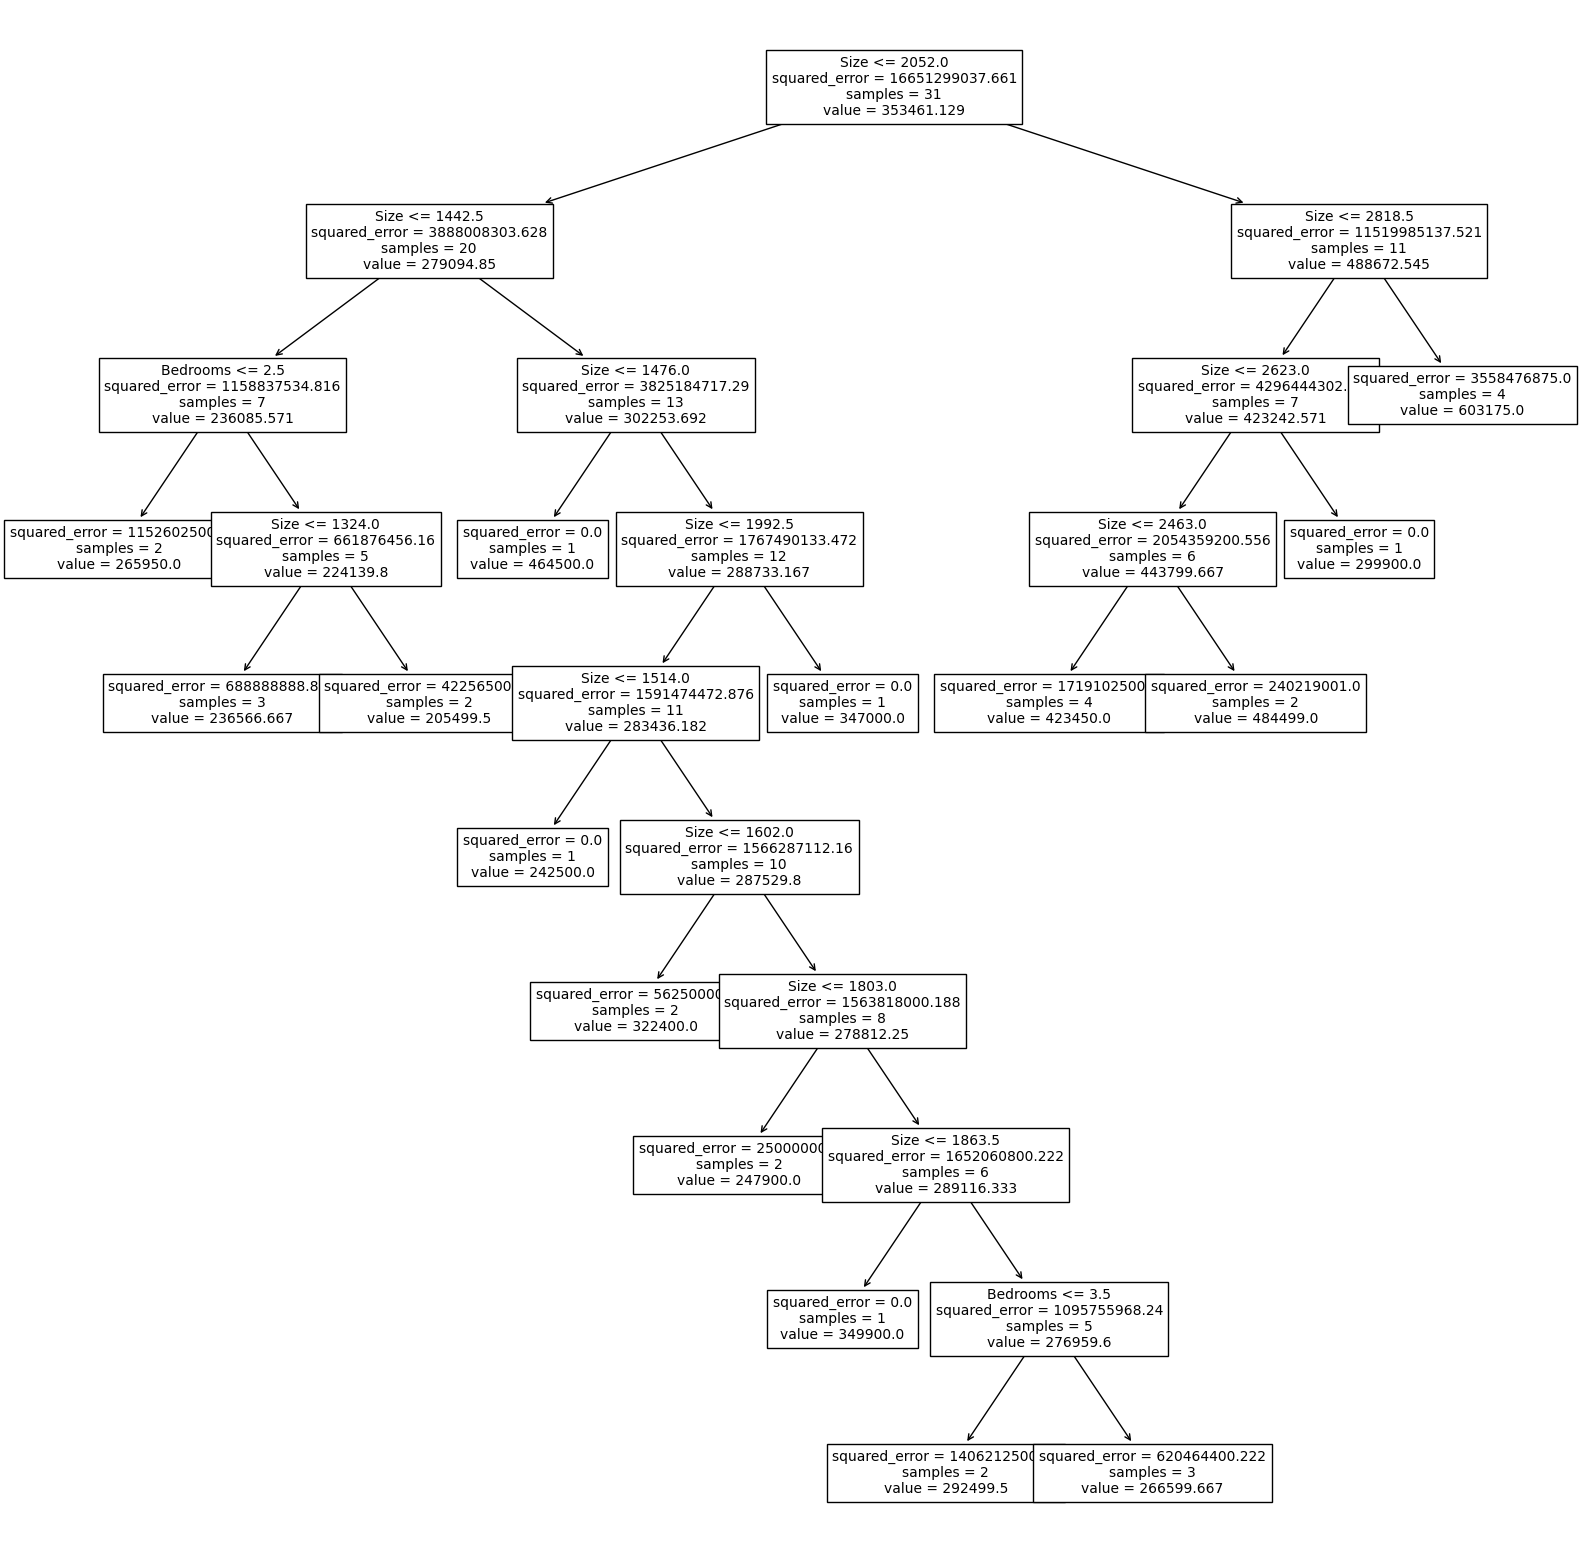

In [29]:
from sklearn import tree as tr
pyplot.figure(figsize=(20,20))
feature_names_list = ['Size','Bedrooms', 'Price']  # Replace with your feature names

tr.plot_tree(tree_reg, feature_names = feature_names_list,fontsize=10)
pyplot.show()

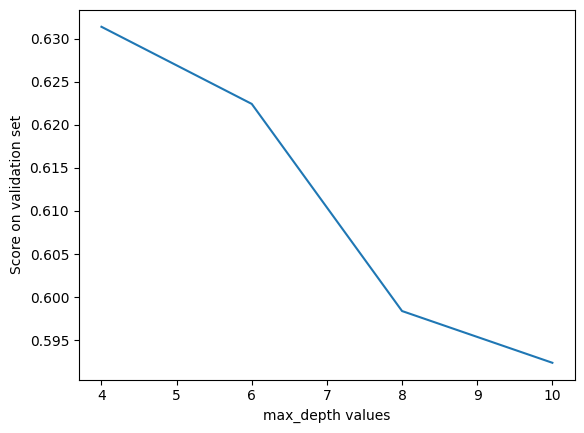

In [30]:
mdepths = [4, 6, 8, 10]
errors = np.zeros(4)
index=0

for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=5)
    tree_reg.fit(train_df.drop('Price',axis=1),train_df['Price'])
    #u=mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])
    u=tree_reg.score(val_df.drop('Price',axis=1),val_df['Price'])
    errors[index]=u
    index+=1

x = np.array(range(0,4))
pyplot.plot(mdepths, errors)
pyplot.xlabel('max_depth values')
pyplot.ylabel('Score on validation set')
pyplot.show()

In [ ]:
#Maximum depth value is 4 which has worked best on validation data set